In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# Load the Iris dataset
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv'
data = pd.read_csv(url)

In [50]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [28]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [29]:
print(data.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [30]:
# Check for missing data
print(data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [31]:
# Check for duplicated data
print(data.duplicated().sum())

0


In [60]:
# Step 2: Data Cleaning
# Drop irrelevant columns: car_ID, CarName
data.drop(['car_ID', 'CarName'], axis=1, inplace=True)

In [61]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column '{column}' unique values:")
    print(unique_values)
    print("\n")

Column 'symboling' unique values:
[ 3  1  2  0 -1 -2]


Column 'fueltype' unique values:
['gas' 'diesel']


Column 'aspiration' unique values:
['std' 'turbo']


Column 'doornumber' unique values:
['two' 'four']


Column 'carbody' unique values:
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


Column 'drivewheel' unique values:
['rwd' 'fwd' '4wd']


Column 'enginelocation' unique values:
['front' 'rear']


Column 'wheelbase' unique values:
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]


Column 'carlength' unique values:
[168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 1

In [62]:
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [55]:
# Identify ordinal categorical variables and encode them
ordinal_categorical_cols = ['symboling', 'doornumber', 'cylindernumber']
ordinal_categorical_mapping = {
    'symboling': {'-2': -2, '-1': -1, '0': 0, '1': 1, '2': 2, '3': 3},
    'doornumber': {'two': 2, 'four': 4},
    'cylindernumber': {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
}
for col in ordinal_categorical_cols:
    data[col] = data[col].map(ordinal_categorical_mapping[col])

In [63]:
# Encode remaining categorical variables using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem','cylindernumber','doornumber','symboling']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [17]:
# Step 3: Data Preprocessing
# Convert categorical variables using one-hot encoding
# data = pd.get_dummies(data, drop_first=True)

In [65]:
# Normalize numerical features using StandardScaler
scaler = StandardScaler()
numerical_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                  'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
                  'citympg', 'highwaympg']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [68]:
# Extract the 'price' column
price = data['price']

# Min-Max scaling for 'price' column
min_price = price.min()
max_price = price.max()
data['price'] = (price - min_price) / (max_price - min_price)

In [69]:
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,5,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.207959
1,5,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.282558
2,3,1,0,1,2,2,0,-0.708596,-0.231513,-0.190566,...,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.282558
3,4,1,0,0,3,1,0,0.173698,0.207256,0.136542,...,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.219254
4,4,1,0,0,3,0,0,0.107110,0.207256,0.230001,...,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,0,0,3,2,0,1.721873,1.198549,1.398245,...,0.339248,5,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,0.291123
201,1,1,1,0,3,2,0,1.721873,1.198549,1.351515,...,0.339248,5,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,0.345738
202,1,1,0,0,3,2,0,1.721873,1.198549,1.398245,...,1.109571,5,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,0.406311
203,1,0,1,0,3,2,0,1.721873,1.198549,1.398245,...,0.435538,3,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059,0.430763


In [70]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column '{column}' unique values:")
    print(unique_values)
    print("\n")

Column 'symboling' unique values:
[5 3 4 2 1 0]


Column 'fueltype' unique values:
[1 0]


Column 'aspiration' unique values:
[0 1]


Column 'doornumber' unique values:
[1 0]


Column 'carbody' unique values:
[0 2 3 4 1]


Column 'drivewheel' unique values:
[2 1 0]


Column 'enginelocation' unique values:
[0 1]


Column 'wheelbase' unique values:
[-1.6907718  -0.70859588  0.17369775  0.10710955  1.17252073  0.1237566
  0.40675645  0.78963859  1.87169681 -1.7240659  -0.84177227  0.75634449
 -0.47553718 -2.02371279 -0.37565488 -0.74188998 -0.45889013  2.3711083
  0.53993284 -0.94165457 -0.57541948  0.00722726  1.02269728  1.32234417
  2.80393159 -0.35900784  3.68622521  2.2046378   0.65646219 -0.95830162
 -0.40894898 -0.60871358 -0.25912554  0.27358005 -1.24130146  0.07381545
  1.52210877  2.57087289  1.53875582 -1.54094836 -0.05936094 -0.44224308
  0.0571684  -0.90836047 -0.29241964 -0.30906669 -0.50883128  0.60652104
  0.68975629  0.95610908 -0.24247849  0.92281498  1.72187336]


Colum

In [71]:
# Step 4: Splitting the Dataset
X = data.drop('price', axis=1)
y = data['price']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [72]:
# Step 5: Model Selection (Random Forest Regressor example)
model = RandomForestRegressor()

# Step 6: Model Training
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred_val = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print("Validation Mean Squared Error:", mse_val)
print("Validation R^2 Score:", r2_val)

# Step 8: Hyperparameter Tuning
# Perform hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV

# Step 9: Final Evaluation
# Evaluate the best model on the test set (unseen data)
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test Mean Squared Error:", mse_test)
print("Test R^2 Score:", r2_test)

# Step 10: Conclusion
# Summarize your findings and consider any insights gained from the analysis.

Validation Mean Squared Error: 0.0012962752805387048
Validation R^2 Score: 0.9565752853861935
Test Mean Squared Error: 0.003469379709683061
Test R^2 Score: 0.9368291960414099


In [ ]:
# import matplotlib.pyplot as plt

# # Histogram of Prices
# plt.figure(figsize=(8, 6))
# plt.hist(y_test, bins=20, color='blue', alpha=0.7, label='Actual Prices')
# plt.hist(y_pred_test, bins=20, color='red', alpha=0.7, label='Predicted Prices')
# plt.xlabel('Price')
# plt.ylabel('Frequency')
# plt.title('Actual vs. Predicted Prices')
# plt.legend()
# plt.grid(True)
# plt.show()

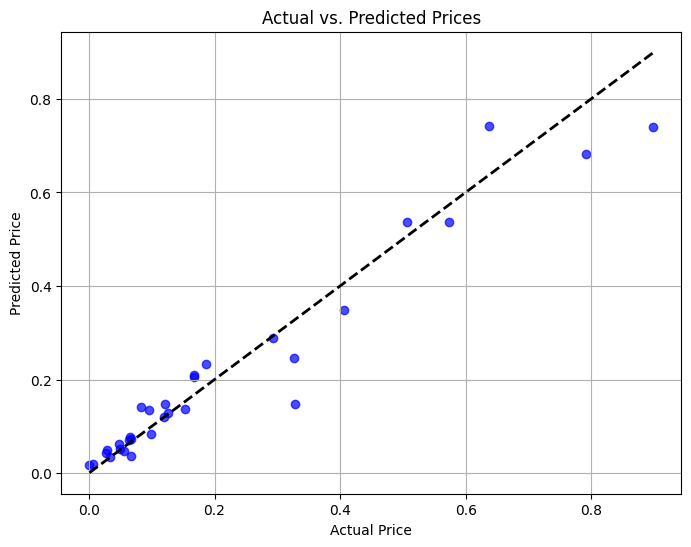

In [107]:
# Scatter Plot of Predicted vs. Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='b', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.show()

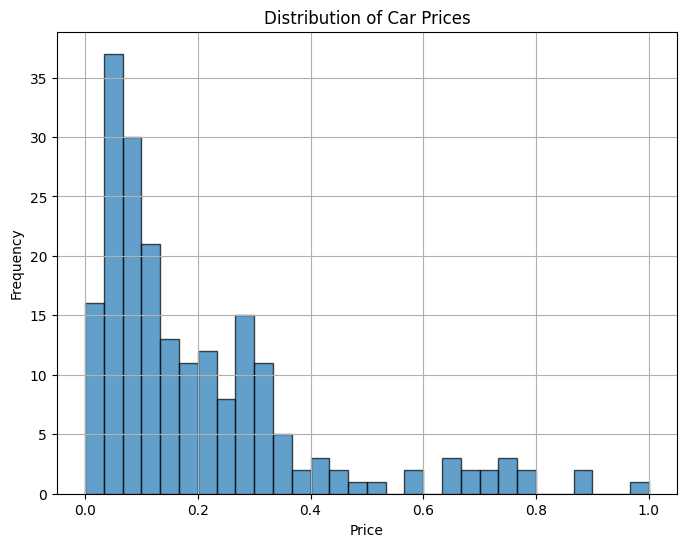

In [77]:
# Plot the distribution of the target variable (price)
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.grid(True)
plt.show()

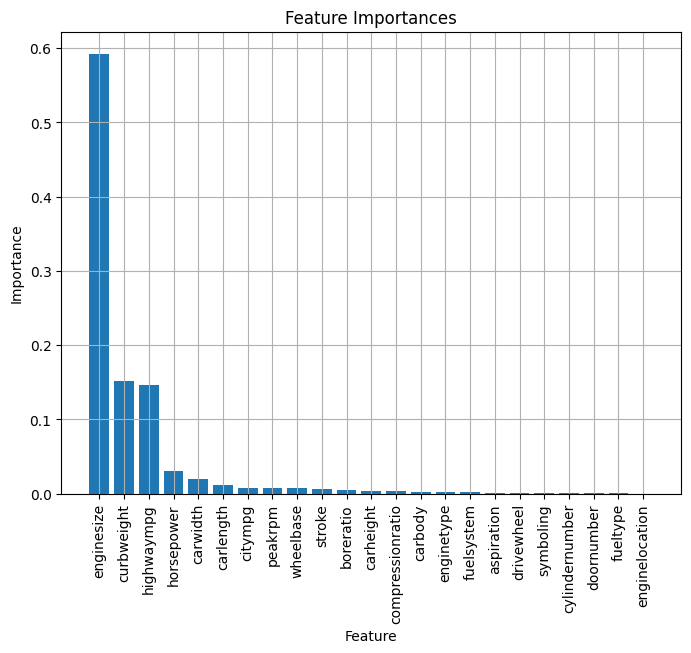

In [80]:
# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.grid(True)
plt.show()

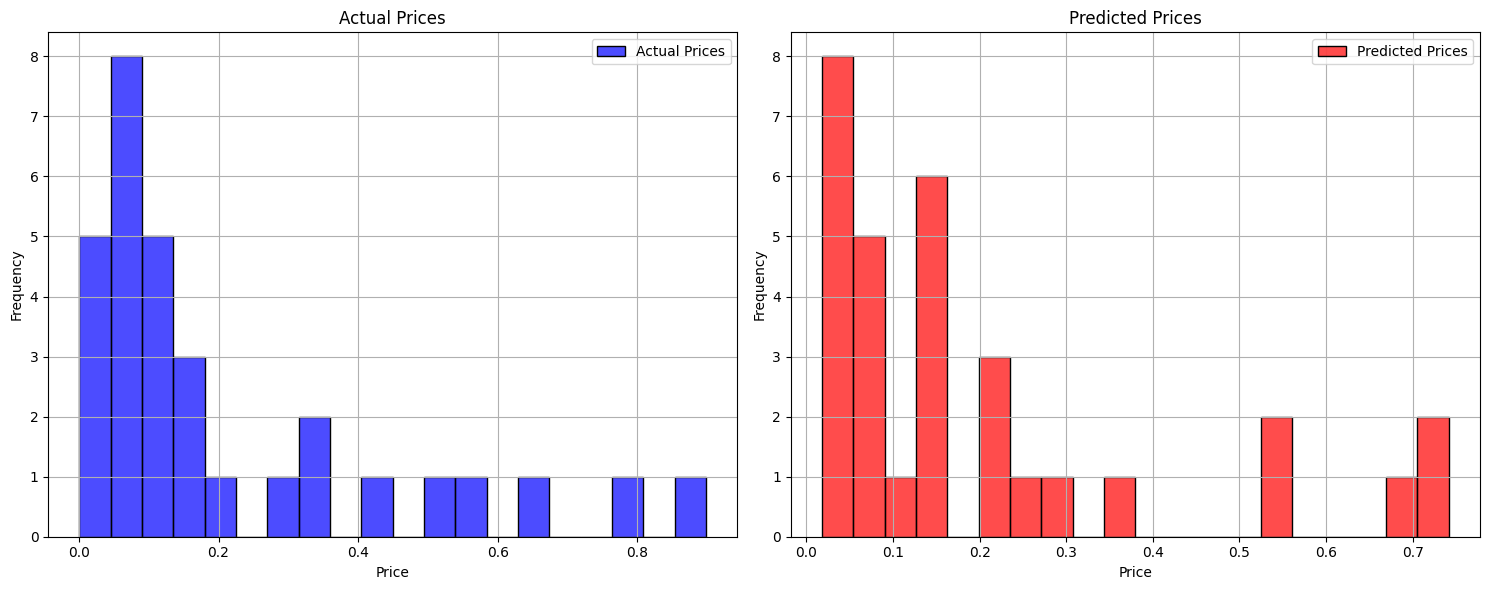

In [99]:
# Create subplots for the actual and predicted price histograms
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histogram of Actual Prices
sns.histplot(y_test, bins=20, color='blue', alpha=0.7, label='Actual Prices', kde=False, ax=axs[0])
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Actual Prices')
axs[0].grid(True)

# Histogram of Predicted Prices
sns.histplot(y_pred_test, bins=20, color='red', alpha=0.7, label='Predicted Prices', kde=False, ax=axs[1])
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Predicted Prices')
axs[1].grid(True)

# Show the legend on the second subplot
axs[0].legend()
axs[1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()
